# Disney+ Subscription Data Analysis

## 1. Data Collection

In [1]:
!kaggle datasets download -d albeyee/subscription-data-disney

Dataset URL: https://www.kaggle.com/datasets/albeyee/subscription-data-disney
License(s): MIT
100%|███████████████████████████████████████| 89.7k/89.7k [00:00<00:00, 827kB/s]
100%|███████████████████████████████████████| 89.7k/89.7k [00:00<00:00, 823kB/s]


In [2]:
import zipfile
zipfile_name = 'subscription-data-disney.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

## 2. Data Cleaning

In [30]:
import pandas as pd
df = pd.read_excel('subscriptiondatadisney.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            905 non-null    object        
 1   Serial Number      905 non-null    object        
 2   Subscription Type  905 non-null    object        
 3   Monthly Revenue    905 non-null    float64       
 4   Join Date          905 non-null    datetime64[ns]
 5   Last Payment Date  905 non-null    datetime64[ns]
 6   Country            905 non-null    object        
 7   Age                905 non-null    int64         
 8   Gender             905 non-null    object        
 9   Device             905 non-null    object        
 10  Plan Duration      905 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 77.9+ KB


In [5]:
df.isnull().sum()

User ID              0
Serial Number        0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

Observation:  
There is no null data.

In [6]:
df.duplicated().sum()

np.int64(0)

Observation:  
There is no duplicated data.

In [7]:
df.head()

,User ID,Serial Number,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,c5ef7249-09ea-4c77-accc-d0ede4a0e196,687278bb-3847-4693-ae61-c671d0165ea5,Basic,68.78,2023-03-14,2024-03-08,UK,22,Male,Tablet,2 Years
1,95609aa8-afc1-4f88-9115-9f65576bfe25,a5aeca44-32d1-4cf0-937d-1fba3b55d382,Standard,37.75,2021-12-17,2023-01-18,France,25,Other,Mobile,1 Year
2,8df8f95e-7126-48c5-9596-5f0089800d8f,d4c4a30f-1c21-40ba-a121-0fcaf36f2989,Basic,72.81,2024-04-04,2024-05-28,USA,60,Other,Desktop,6 Months
3,90d7e0da-d2f5-4cb6-937c-5c1c043801bc,76f20b88-7c1f-42e1-baa4-372f523e7a14,Standard,65.72,2022-12-05,2023-11-06,USA,47,Female,Mobile,6 Months
4,e29e8d57-637e-4f0c-978a-831b7621e4f6,77073e5a-fd1e-413a-8664-05b8ef8d7801,Standard,42.92,2022-11-24,2023-09-17,France,53,Female,Mobile,2 Years


In [31]:
# Change df['Plan Duration'] to month unit

def convert_duration(duration):
    if 'Year' in duration or 'Years' in duration:
        num = int(duration.split()[0]) * 12
    elif 'Month' or 'Months':
        num = int(duration.split()[0])
    return num

df['Plan Duration'] = df['Plan Duration'].apply(convert_duration)
df['Plan Duration'].astype(int)
df.rename(columns={'Plan Duration': 'Plan Duration in Month'}, inplace=True)

In [32]:
df.head()

,User ID,Serial Number,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration in Month
0,c5ef7249-09ea-4c77-accc-d0ede4a0e196,687278bb-3847-4693-ae61-c671d0165ea5,Basic,68.78,2023-03-14,2024-03-08,UK,22,Male,Tablet,24
1,95609aa8-afc1-4f88-9115-9f65576bfe25,a5aeca44-32d1-4cf0-937d-1fba3b55d382,Standard,37.75,2021-12-17,2023-01-18,France,25,Other,Mobile,12
2,8df8f95e-7126-48c5-9596-5f0089800d8f,d4c4a30f-1c21-40ba-a121-0fcaf36f2989,Basic,72.81,2024-04-04,2024-05-28,USA,60,Other,Desktop,6
3,90d7e0da-d2f5-4cb6-937c-5c1c043801bc,76f20b88-7c1f-42e1-baa4-372f523e7a14,Standard,65.72,2022-12-05,2023-11-06,USA,47,Female,Mobile,6
4,e29e8d57-637e-4f0c-978a-831b7621e4f6,77073e5a-fd1e-413a-8664-05b8ef8d7801,Standard,42.92,2022-11-24,2023-09-17,France,53,Female,Mobile,24


## 3. Data Exploration

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
numerical_col = ['Monthly Revenue']
categorical_col = ['Subscription Type', 'Country', 'Age', 'Gender', 'Device', 'Plan Duration in Month']

### 3.1. Univariate Analysis

#### 3.1.1 Distribution of numerical variables

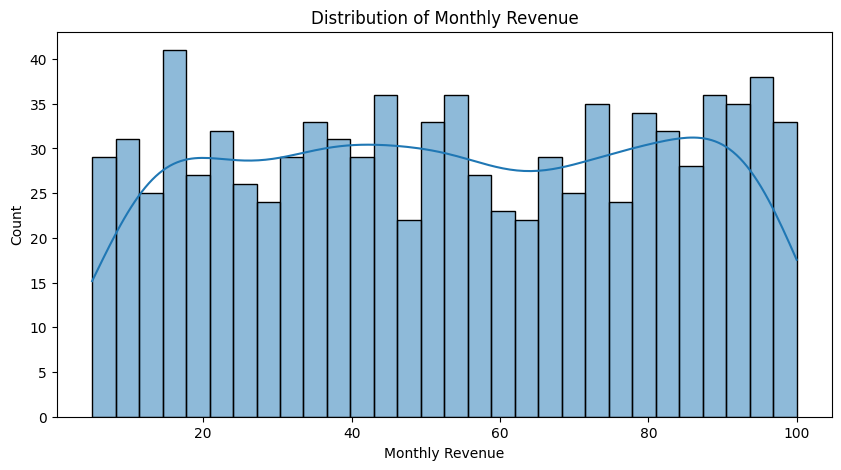

In [23]:
for col in numerical_col:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

#### 3.1.2. Counter plot of categorical variables

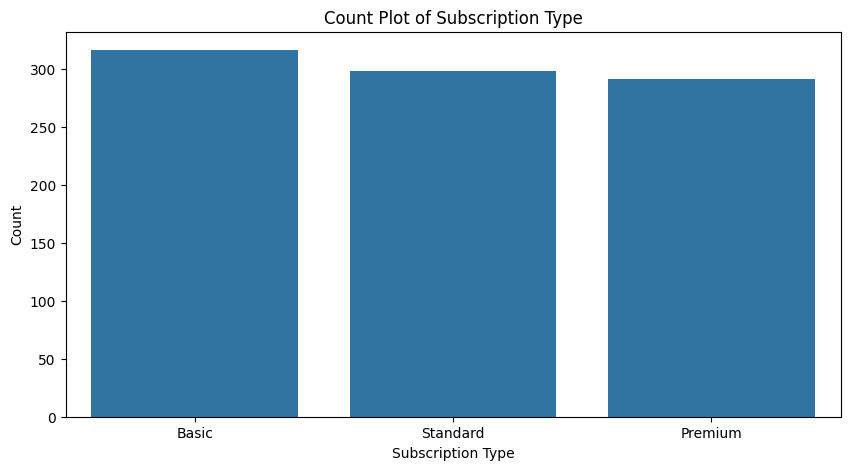

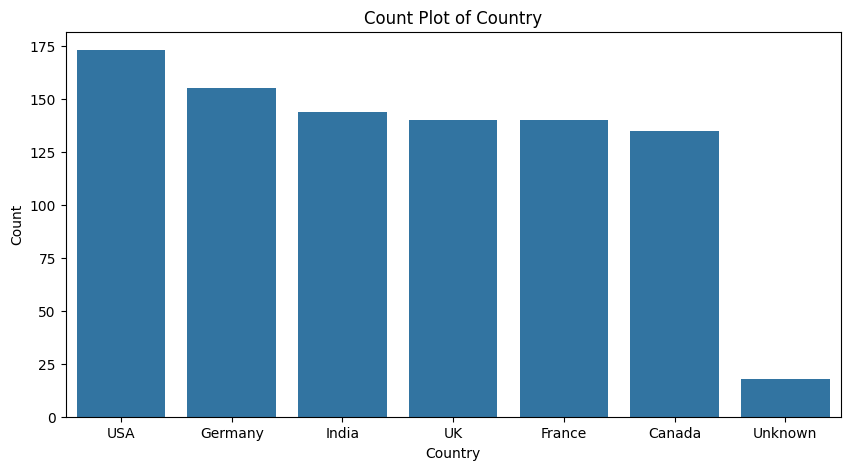

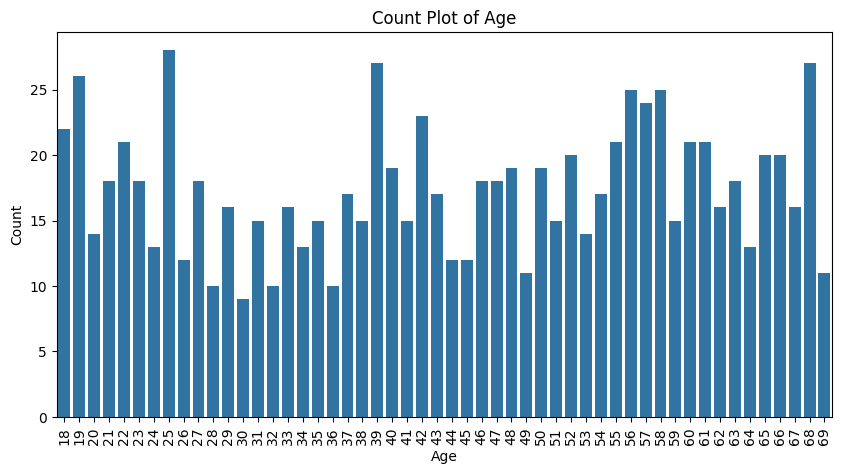

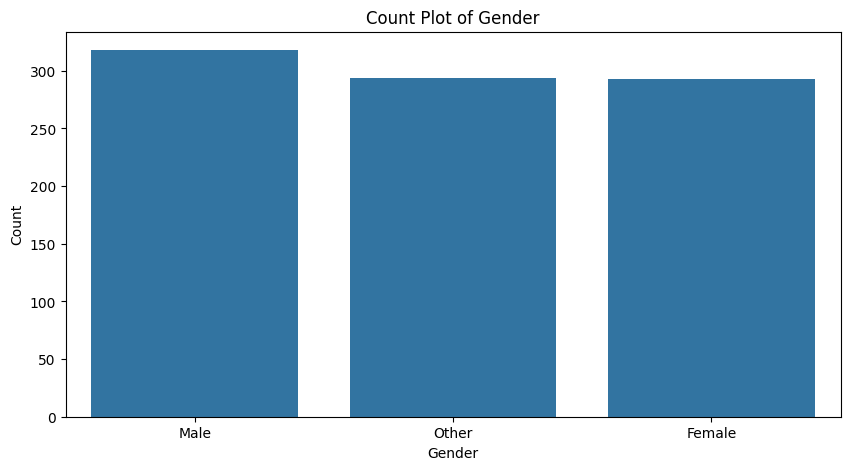

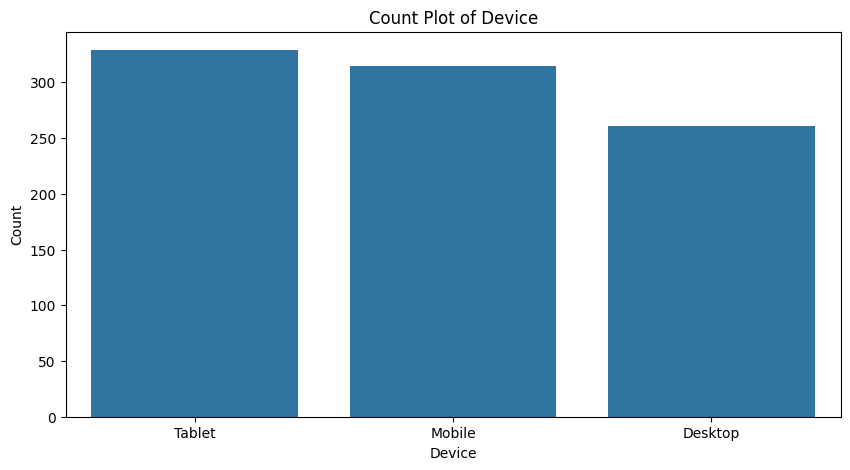

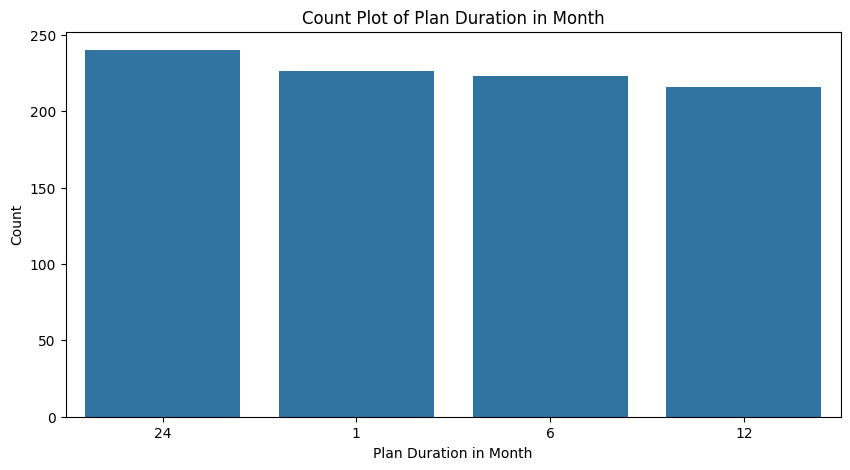

In [27]:
for col in categorical_col:
    plt.figure(figsize=(10,5))
    if col == 'Age':
        sns.countplot(data=df, x=col)
        plt.xticks(rotation=90)
    else:
        order = df[col].value_counts().index
        sns.countplot(data=df, x=col, order=order)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

### 3.2. Bivariate Analysis

#### 3.2.1. Box plots of numerical variables vs. categorical variables 

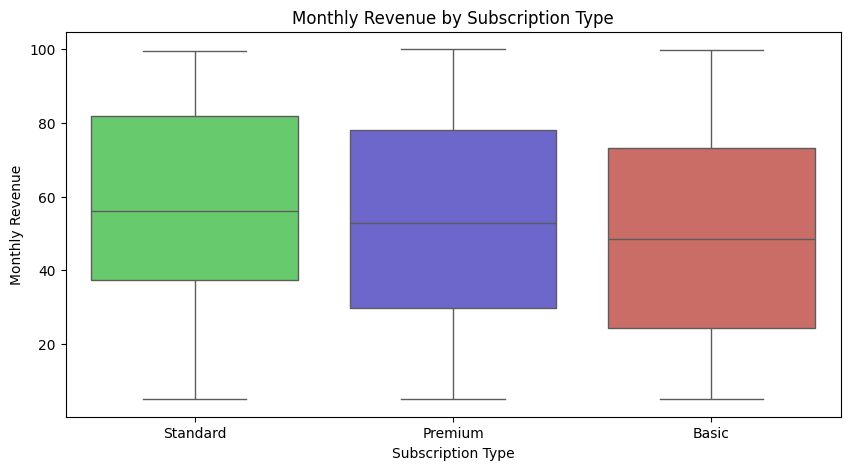

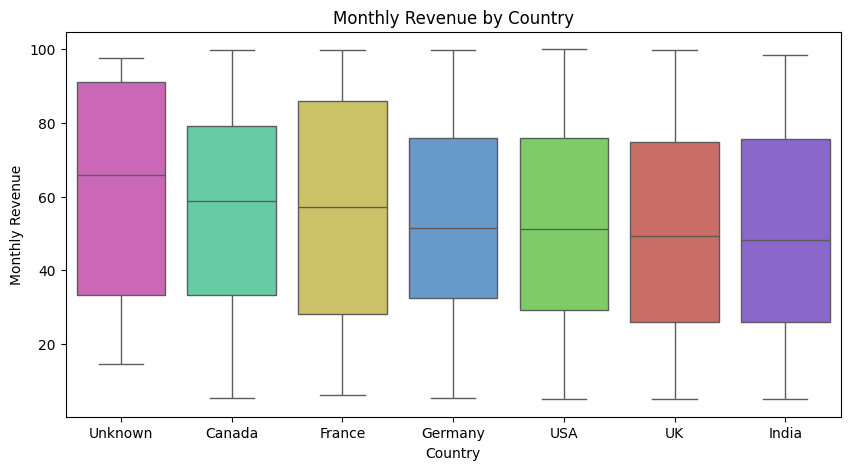

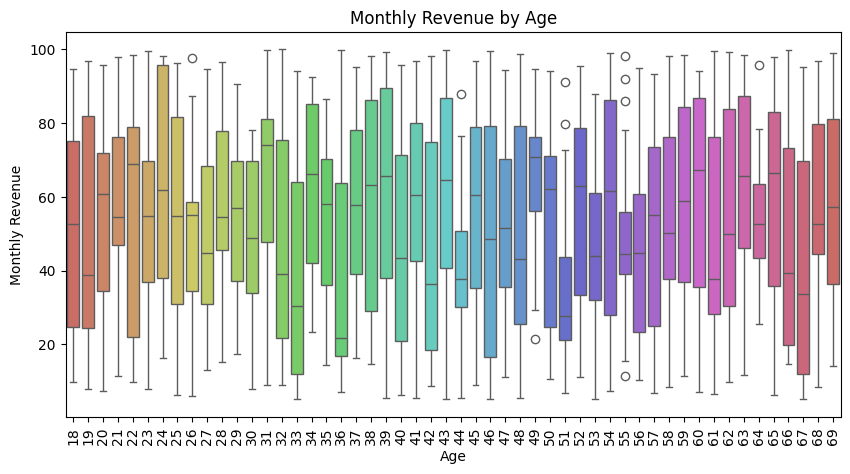

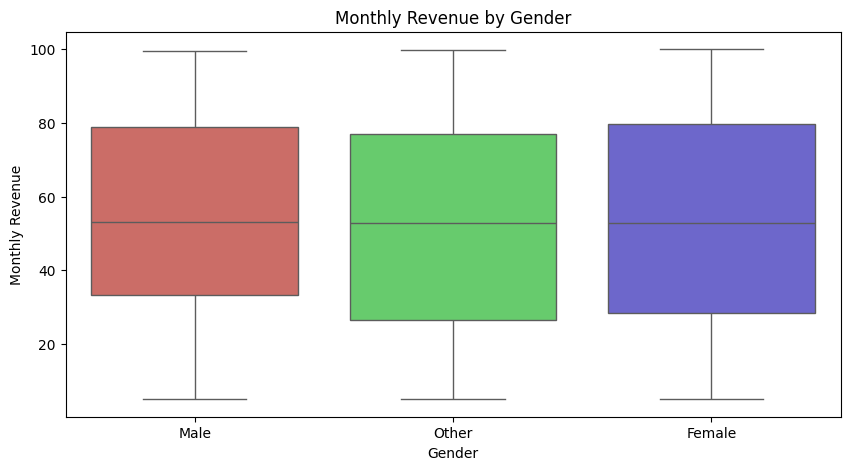

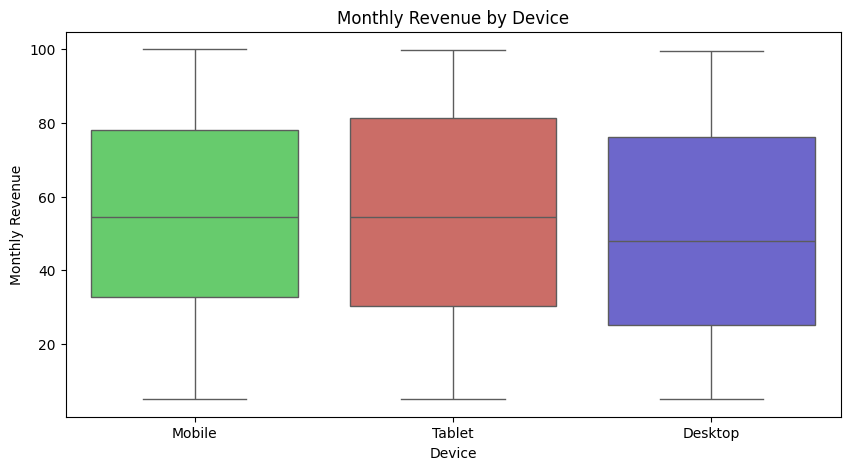

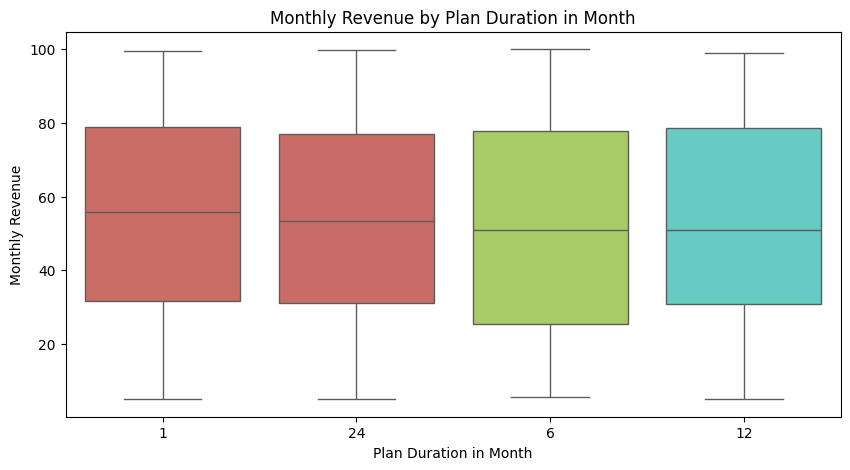

In [33]:
for col_c in categorical_col:
    for col_n in numerical_col:
        plt.figure(figsize=(10,5)) 
        if col_c == 'Age':
            sns.boxplot(x=df[col_c], y=df[col_n], palette='hls', hue=df[col_c], legend=False)
            plt.xticks(rotation=90)
        else:
            median_values = df.groupby(col_c)[col_n].median()
            sorted_categories = median_values.sort_values(ascending=False).index
            sns.boxplot(x=df[col_c], y=df[col_n], order=sorted_categories, palette='hls', hue=df[col_c], legend=False)
        plt.title(f'{col_n} by {col_c}')
        plt.xlabel(col_c)
        plt.ylabel(col_n)
        plt.show()

In [33]:
# Export to Excel
df.to_excel('disney_subscription_data_final.xlsx', sheet_name='Data')

In [38]:
# Create a date range for the entire period across all users
start_date = df['Join Date'].dt.to_period('M').min()
end_date = df['Last Payment Date'].dt.to_period('M').max()
date_range = pd.period_range(start=start_date, end=end_date, freq='M')

# Create an empty DataFrame to store the monthly revenue data
monthly_revenue_df = pd.DataFrame(columns=['User ID', 'Date by Month', 'Monthly Revenue'])

# Function to calculate revenue for each month
def calculate_monthly_revenue(row):
    user_id = row['User ID']
    join_date = pd.to_datetime(row['Join Date']).to_period('M')
    last_payment_date = pd.to_datetime(row['Last Payment Date']).to_period('M')
    monthly_revenue = row['Monthly Revenue']
    
    # Filter date_range for months within the user's subscription period
    relevant_months = date_range[(date_range >= join_date) & (date_range <= last_payment_date)]
    
    for date in relevant_months:
        # Create a new row for each relevant month
        monthly_revenue_df.loc[len(monthly_revenue_df)] = [user_id, date, monthly_revenue]

# Apply the function to each row of the DataFrame
df.apply(calculate_monthly_revenue, axis=1)

# Sort the DataFrame by User ID and Date
#monthly_revenue_df = monthly_revenue_df.sort_values(by=['User ID', 'Date by Month'])

# Output the result
print(monthly_revenue_df)


                                   User ID Date by Month  Monthly Revenue
0     c5ef7249-09ea-4c77-accc-d0ede4a0e196       2023-03            68.78
1     c5ef7249-09ea-4c77-accc-d0ede4a0e196       2023-04            68.78
2     c5ef7249-09ea-4c77-accc-d0ede4a0e196       2023-05            68.78
3     c5ef7249-09ea-4c77-accc-d0ede4a0e196       2023-06            68.78
4     c5ef7249-09ea-4c77-accc-d0ede4a0e196       2023-07            68.78
...                                    ...           ...              ...
9176  82e026de-e31d-4e3b-885a-33fb70c2279b       2024-01            44.61
9177  82e026de-e31d-4e3b-885a-33fb70c2279b       2024-02            44.61
9178  82e026de-e31d-4e3b-885a-33fb70c2279b       2024-03            44.61
9179  82e026de-e31d-4e3b-885a-33fb70c2279b       2024-04            44.61
9180  82e026de-e31d-4e3b-885a-33fb70c2279b       2024-05            44.61

[9181 rows x 3 columns]


In [40]:
# Export to Excel
monthly_revenue_df.to_excel('disney_subscription_data_final_revenue.xlsx', sheet_name='Data')